In [146]:
import random
import math
import copy
import sys
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [147]:
def show_vector(vector):
    for i in range(len(vector)):
        print("\n", end="")
        if vector[i] >= 0.0:
            print(' ', end="")
        print("%.4f" % vector[i], end="") # forur decimals
        print(" ", end="")
    print("\n")

In [148]:
def error(position):
    err = 0.0
    for i in range(len(position)):
        xi = position[i]
        err += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
    return err

In [149]:
class Particle:
  def __init__(self, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
    self.position = [0.0 for i in range(dim)]
    self.velocity = [0.0 for i in range(dim)]
    self.best_part_pos = [0.0 for i in range(dim)]

    for i in range(dim):
      self.position[i] = ((maxx - minx) *
        self.rnd.random() + minx)
      self.velocity[i] = ((maxx - minx) *
        self.rnd.random() + minx)

    self.error = error(self.position) # curr error
    self.best_part_pos = copy.copy(self.position) 
    self.best_part_err = self.error # best error

In [150]:
def Solve(max_epochs, n, dim, minx, maxx, w, c1, c2):
  rnd = random.Random(0)

  # create n random particles
  swarm = [Particle(dim, minx, maxx, i) for i in range(n)] 

  best_swarm_pos = [0.0 for i in range(dim)] # not necess.
  best_swarm_err = sys.float_info.max # swarm best
  for i in range(n): # check each particle
    if swarm[i].error < best_swarm_err:
      best_swarm_err = swarm[i].error
      best_swarm_pos = copy.copy(swarm[i].position) 

  epoch = 0
  errors = []
  start_time = time.time()

  while epoch < max_epochs:
    
    if epoch % 10 == 0 and epoch > 1:
      print("Epoch = " + str(epoch) +
        " best error = %.3f" % best_swarm_err)

    for i in range(n): # process each particle
      
      # compute new velocity of curr particle
      for k in range(dim): 
        r1 = rnd.random()    # randomizations
        r2 = rnd.random()
    
        swarm[i].velocity[k] = ( (w * swarm[i].velocity[k]) +
          (c1 * r1 * (swarm[i].best_part_pos[k] -
          swarm[i].position[k])) +  
          (c2 * r2 * (best_swarm_pos[k] -
          swarm[i].position[k])) )  

        if swarm[i].velocity[k] < minx:
          swarm[i].velocity[k] = minx
        elif swarm[i].velocity[k] > maxx:
          swarm[i].velocity[k] = maxx

      # compute new position using new velocity
      for k in range(dim): 
        swarm[i].position[k] += swarm[i].velocity[k]
  
      # compute error of new position
      swarm[i].error = error(swarm[i].position)

      # is new position a new best for the particle?
      if swarm[i].error < swarm[i].best_part_err:
        swarm[i].best_part_err = swarm[i].error
        swarm[i].best_part_pos = copy.copy(swarm[i].position)

      # is new position a new best overall?
      if swarm[i].error < best_swarm_err:
        best_swarm_err = swarm[i].error
        best_swarm_pos = copy.copy(swarm[i].position)

    errors.append(best_swarm_err)
    # for-each particle
    epoch += 1
  end_time = time.time()
  # while
  total_time = end_time - start_time
  return best_swarm_pos, errors, total_time
# end Solve

In [151]:
num_particles = 50
max_epochs = 100
dim = 3
minx = -10.12
maxx = 10.12

In [152]:
w = 0.729
c1 = 1.49445
c2 = 1.49445

In [153]:
best_position, errors, total_time = Solve(max_epochs, num_particles, dim, minx, maxx, w, c1, c2)

Epoch = 10 best error = 4.123
Epoch = 20 best error = 4.123
Epoch = 30 best error = 2.640
Epoch = 40 best error = 2.351
Epoch = 50 best error = 1.093
Epoch = 60 best error = 1.043
Epoch = 70 best error = 0.101
Epoch = 80 best error = 0.019
Epoch = 90 best error = 0.008


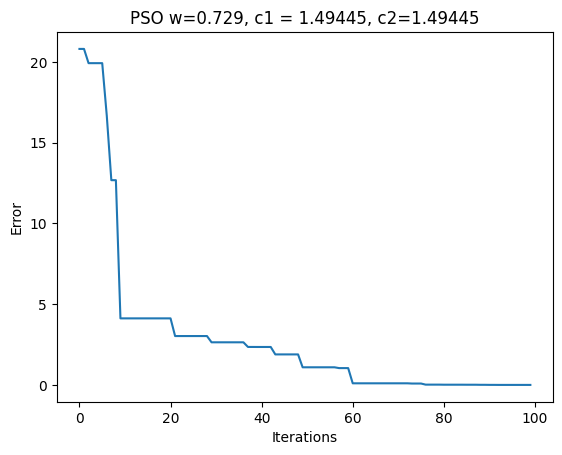

In [154]:
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title(f'PSO w={w}, c1 = {c1}, c2={c2}')
plt.show()

In [155]:
print("\nPSO completed\n")
print("\nBest solution found:")
show_vector(best_position)
err = error(best_position)
print("Error of best solution = %.6f" % err)


PSO completed


Best solution found:

 0.0007 
 0.0017 
 0.0013 

Error of best solution = 0.000964


In [156]:
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2*np.pi*x)) for x in X])

In [157]:
x = np.linspace(-5.12, 5.12, 400)
y = np.linspace(-5.12, 5.12, 400)
X, Y = np.meshgrid(x, y)
Z = np.array([rastrigin([x, y]) for x, y in zip(X.flatten(), Y.flatten())])
Z = Z.reshape(X.shape)

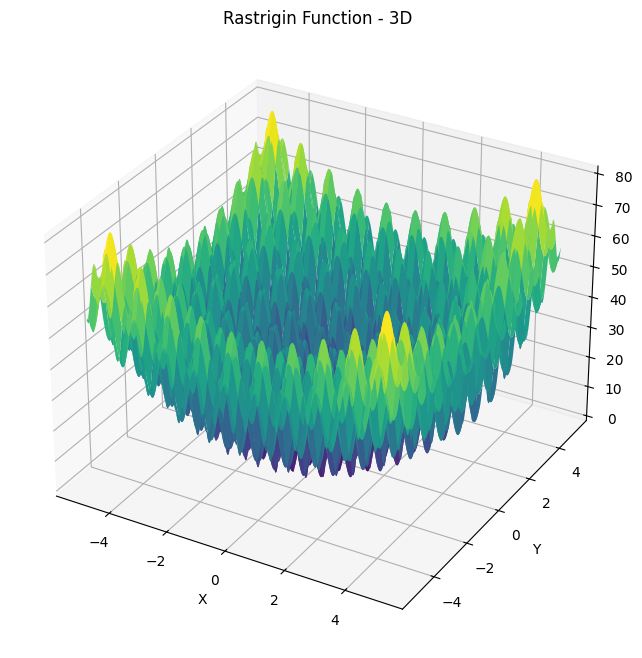

In [158]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Rastrigin Function - 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()